In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))


# from src.config.setup import SetupConfig
from src.data_workflow.create_tables.create_tables import retrieve_all_table_data

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Retrieve Data Integrated
view_di = retrieve_all_table_data('view_data_integration')

# Dimensiones Dataset
print(f'Dimensiones Dataset: {view_di.shape=}')

Dimensiones Dataset: view_di.shape=(1016193, 30)


In [3]:
view_di.head(3)

FORMULARIO  CODIGO_ACCIDENTE FECHA_OCURRENCIA_ACC HORA_OCURRENCIA_ACC  \
0  A000033958            514216  2014-10-13 19:00:00            14:40:00   
1  A000037228           4399672  2014-11-27 19:00:00            15:20:00   
2  A000036014           4399723  2014-11-27 19:00:00            05:10:00   

   ANO_OCURRENCIA_ACC MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC  \
0                2014            OCTUBRE             MARTES   
1                2014          NOVIEMBRE            VIERNES   
2                2014          NOVIEMBRE            VIERNES   

        FECHA_HORA_ACC                     DIRECCION    GRAVEDAD  ... ESTADO  \
0  2014-10-14 09:40:00               CL 17-KR 114 02  SOLO DANOS  ...  ILESO   
1  2014-11-28 10:20:00                AK 72-CL 13 02  SOLO DANOS  ...  ILESO   
2  2014-11-28 00:10:00  AV AVENIDA BOYACA-CL 61 S 42  SOLO DANOS  ...  ILESO   

      FECHA_NACIMIENTO  EDAD     GENERO MUERTE_POSTERIOR  \
0  1989-05-09 19:00:00  25.0  MASCULINO                N   
1  1966-06-01 19:00:00  48.0  MASCULINO                N   
2  1979-02-04 19:00:00  35.0  MASCULINO                N   

   FECHA_POSTERIOR_MUERTE  CLASE_DE_VEHICULO TIPO_DE_SERVICIO     MODALIDAD  \
0     1975-01-01 01:00:00     CAMION, FURGON          PUBLICO  CARGA-PESADA   
1     1975-01-01 01:00:00       TRACTOCAMION          PUBLICO  CARGA-PESADA   
2     1975-01-01 01:00:00           VOLQUETA       PARTICULAR          None   

  ENFUGA  
0      N  
1      N  
2      N  

[3 rows x 30 columns]

In [4]:
# Excluir Variables que no aportan al modelo: Códigos
cod_variables = ['FORMULARIO', 'CODIGO_ACCIDENTE', 'CODIGO_ACCIDENTADO', 'CODIGO_VEHICULO', 'MUERTE_POSTERIOR', 'FECHA_POSTERIOR_MUERTE', 'MUNICIPIO'] # Municipio siempre es Bogotá, fecha y muerte posterior son inconsistentes

# Copy View
view_di_copy = view_di.copy()

# Drop Variables
view_di_copy.drop(columns=cod_variables, inplace=True)

# Llenar Nulos
for column in view_di_copy.columns:
    if view_di_copy[column].dtype == 'object':  # Identifica columnas categóricas
        view_di_copy[column] = view_di_copy[column].fillna('SIN INFORMACION')
    else:  # Para columnas numéricas
        view_di_copy[column] = view_di_copy[column].fillna(-1)


# Corregir Espacios en Blanco Tipo-Servicio
view_di_copy['TIPO_DE_SERVICIO'] = view_di_copy['TIPO_DE_SERVICIO'].str.strip()
        
# Corregir NO IDENTIFICADO
view_di_copy.loc[view_di_copy['CLASE_DE_VEHICULO'] == 'SIN INFORMACION', 'CLASE_DE_VEHICULO'] = 'NO IDENTIFICADO'

# Excluir Localidades sin información (Menos del 1%)
view_di_copy = view_di_copy[view_di_copy['LOCALIDAD'] != 'SIN INFORMACION']

# Excluir registros sin información del GENERO (Menos del 2%)
view_di_copy = view_di_copy[view_di_copy['GENERO'] != 'SIN INFORMACION']

# Excluir registros sin información de la GRAVEDAD del accidente (Menos del 0.01%)
view_di_copy = view_di_copy[view_di_copy['GRAVEDAD'] != 'SIN INFORMACION'].reset_index(drop=True)

# Excluir registros sin información de la CONDICION_ACCIDENTADO (Menos del 0.01%)
view_di_copy = view_di_copy[view_di_copy['CONDICION_ACCIDENTADO'] != 'SIN INFORMACION'].reset_index(drop=True)


print(f'Dimensiones Dataset: {view_di_copy.shape=}')

Dimensiones Dataset: view_di_copy.shape=(997922, 23)


#### **Análisis Exploratorio**

In [5]:
view_di_copy.head(3)

FECHA_OCURRENCIA_ACC HORA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC  \
0  2014-10-13 19:00:00            14:40:00                2014   
1  2014-11-27 19:00:00            15:20:00                2014   
2  2014-11-27 19:00:00            05:10:00                2014   

  MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC       FECHA_HORA_ACC  \
0            OCTUBRE             MARTES  2014-10-14 09:40:00   
1          NOVIEMBRE            VIERNES  2014-11-28 10:20:00   
2          NOVIEMBRE            VIERNES  2014-11-28 00:10:00   

                      DIRECCION    GRAVEDAD TIPO_CAUSA  nroinfracciones  ...  \
0               CL 17-KR 114 02  SOLO DANOS  CONDUCTOR              1.0  ...   
1                AK 72-CL 13 02  SOLO DANOS  CONDUCTOR              1.0  ...   
2  AV AVENIDA BOYACA-CL 61 S 42  SOLO DANOS  CONDUCTOR              1.0  ...   

    LONGITUD CONDICION_ACCIDENTADO  ESTADO     FECHA_NACIMIENTO  EDAD  \
0 -74.154153             CONDUCTOR   ILESO  1989-05-09 19:00:00  25.0   
1 -74.126261             CONDUCTOR   ILESO  1966-06-01 19:00:00  48.0   
2 -74.139285             CONDUCTOR   ILESO  1979-02-04 19:00:00  35.0   

      GENERO CLASE_DE_VEHICULO  TIPO_DE_SERVICIO        MODALIDAD ENFUGA  
0  MASCULINO    CAMION, FURGON           PUBLICO     CARGA-PESADA      N  
1  MASCULINO      TRACTOCAMION           PUBLICO     CARGA-PESADA      N  
2  MASCULINO          VOLQUETA        PARTICULAR  SIN INFORMACION      N  

[3 rows x 23 columns]

In [6]:
view_di_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997922 entries, 0 to 997921
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FECHA_OCURRENCIA_ACC   997922 non-null  object 
 1   HORA_OCURRENCIA_ACC    997922 non-null  object 
 2   ANO_OCURRENCIA_ACC     997922 non-null  int64  
 3   MES_OCURRENCIA_ACC     997922 non-null  object 
 4   DIA_OCURRENCIA_ACC     997922 non-null  object 
 5   FECHA_HORA_ACC         997922 non-null  object 
 6   DIRECCION              997922 non-null  object 
 7   GRAVEDAD               997922 non-null  object 
 8   TIPO_CAUSA             997922 non-null  object 
 9   nroinfracciones        997922 non-null  float64
 10  CLASE_ACC              997922 non-null  object 
 11  LOCALIDAD              997922 non-null  object 
 12  LATITUD                997922 non-null  float64
 13  LONGITUD               997922 non-null  float64
 14  CONDICION_ACCIDENTADO  997922 non-nu

**Resumen Estadístico**

In [7]:
# Resumen básico
view_di_copy.describe().round(0)

ANO_OCURRENCIA_ACC  nroinfracciones   LATITUD  LONGITUD      EDAD
count            997922.0         997922.0  997922.0  997922.0  997922.0
mean               2015.0              0.0       5.0     -74.0      37.0
std                   5.0              1.0       0.0       0.0      22.0
min                2002.0             -1.0       4.0     -74.0   -7624.0
25%                2011.0             -1.0       5.0     -74.0      27.0
50%                2015.0              1.0       5.0     -74.0      35.0
75%                2019.0              1.0       5.0     -74.0      46.0
max                2024.0              3.0       5.0     -74.0    2008.0

**Análisis Univariado**

In [141]:
def print_frequency(freq_var):
    """
    """
    # Suma Total freq
    ttal_freq = freq_var.sum()

    print("\nFrecuencia formateada:")
    print("{:<20} {:<15} {}".format("Categoría", "Frecuencia", "Participación"))

    # Print freq
    for label, freq in freq_var.items():
        part = (freq / ttal_freq) * 100
        print("{:<20} {:<15} {:.2f}%".format(label, freq, part))


def plot_frequency(data: pd.DataFrame, 
                categorical_variable: str,
                figsize: tuple,
                color: str,
                rotation: int):
    """
    """
    # Calculate Frequency
    freq_var = data[categorical_variable].value_counts()

    # Print Frequency
    print_frequency(freq_var)

    # Create Plot
    plt.figure(figsize=figsize)

    freq_var.plot(kind='bar', color=color)
    plt.title(f'Distribución de {categorical_variable.upper()}')
    plt.xlabel(f'{categorical_variable.capitalize()}')
    plt.ylabel(f'Frequency')
    plt.xticks(rotation=rotation)

    # Show plot
    plt.show()


Frecuencia formateada:
Categoría            Frecuencia      Participación
MASCULINO            830599          83.23%
FEMENINO             167323          16.77%


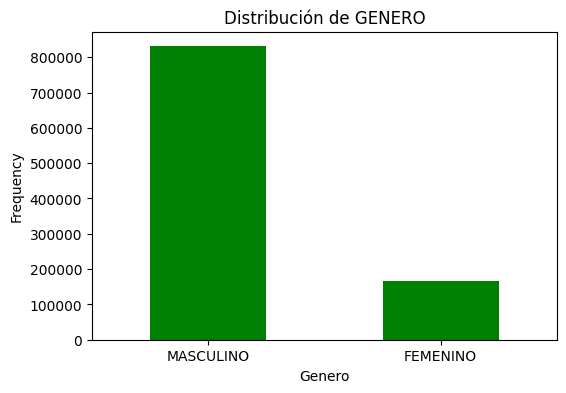

In [142]:
# Frecuencia Género
plot_frequency(view_di_copy, 'GENERO', (6, 4), 'green', 0)


Frecuencia formateada:
Categoría            Frecuencia      Participación
SOLO DANOS           592582          59.38%
CON HERIDOS          388055          38.89%
CON MUERTOS          17285           1.73%


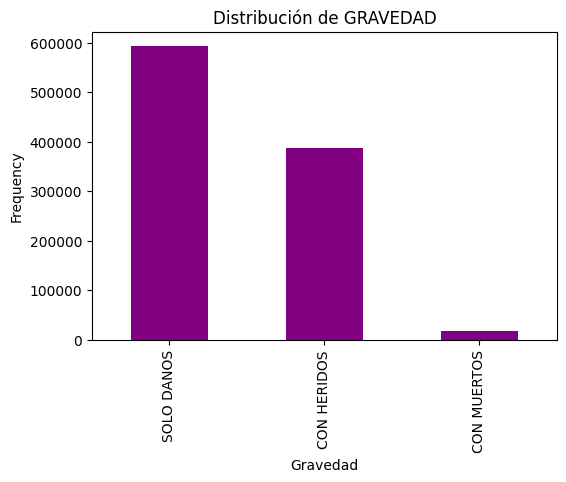

In [143]:
# Frecuencias: Gravedad
plot_frequency(view_di_copy, 'GRAVEDAD', (6, 4), 'purple', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
AUTOMOVIL            381243          38.20%
MOTOCICLETA          142673          14.30%
CAMIONETA            115670          11.59%
BUS                  90362           9.06%
NO IDENTIFICADO      65617           6.58%
CAMION, FURGON       51865           5.20%
CAMPERO              39162           3.92%
MICROBUS             34165           3.42%
BICICLETA            27923           2.80%
BUSETA               22522           2.26%
TRACTOCAMION         12293           1.23%
VOLQUETA             8613            0.86%
BUS ARTICULADO       2205            0.22%
BUS ALIMENTADOR      1500            0.15%
OTRO                 669             0.07%
MOTOCICLO            442             0.04%
TRACCION ANIMAL      355             0.04%
MOTOCARRO            245             0.02%
M. INDUSTRIAL        146             0.01%
BICITAXI             94              0.01%
M. AGRICOLA          84              0.01%
CUATRIMOTO         

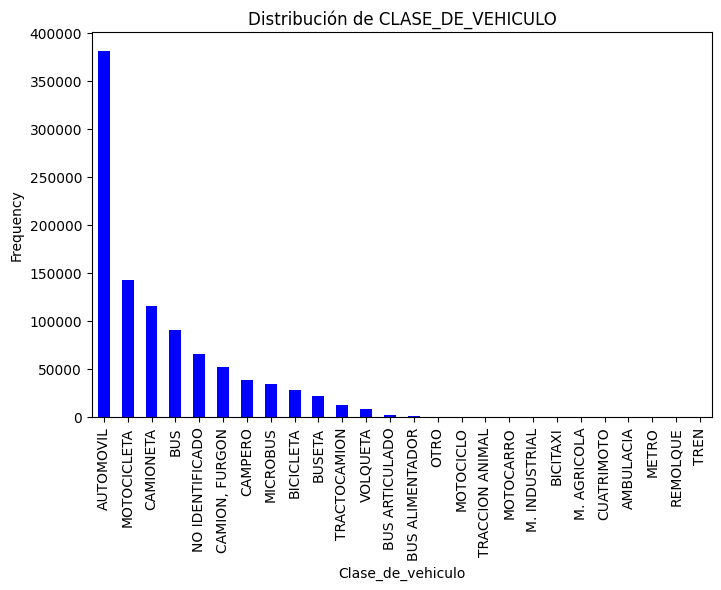

In [144]:
# Frecuencias: Clase de Vehiculo
plot_frequency(view_di_copy, 'CLASE_DE_VEHICULO', (8, 5), 'blue', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
PARTICULAR           514771          51.58%
PUBLICO              374214          37.50%
SIN INFORMACION      86955           8.71%
OFICIAL              20939           2.10%
DIPLOMATICO          1043            0.10%


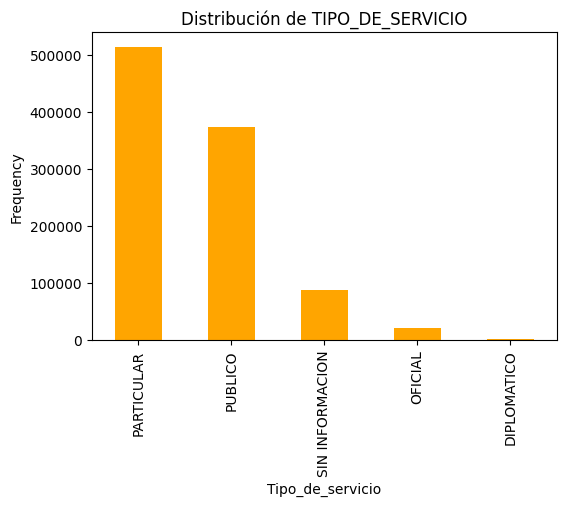

In [145]:
# Frecuencias: TIPO_DE_SERVICIO
plot_frequency(view_di_copy, 'TIPO_DE_SERVICIO', (6, 4), 'orange', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
CHOQUE               845913          84.77%
ATROPELLO            109872          11.01%
CAIDA DE OCUPANTE    21610           2.17%
VOLCAMIENTO          9767            0.98%
OTRO                 8185            0.82%
AUTOLESION           2248            0.23%
SIN INFORMACION      264             0.03%
INCENDIO             63              0.01%


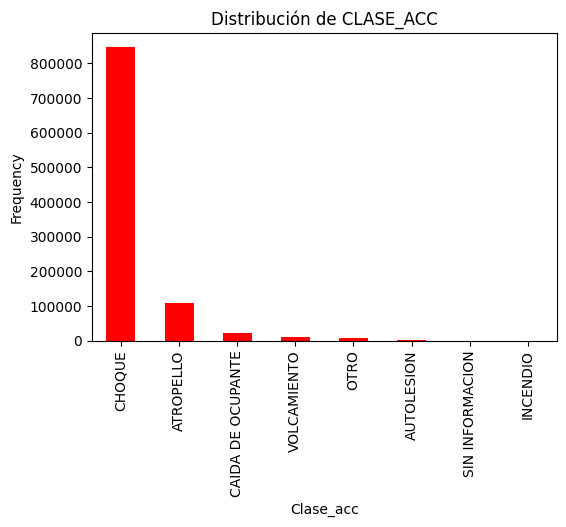

In [146]:
# Frecuencias: CLASE_ACC
plot_frequency(view_di_copy, 'CLASE_ACC', (6, 4), 'red', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
CONDUCTOR            729713          71.81%
MOTOCICLISTA         124815          12.28%
PASAJERO             71304           7.02%
PEATON               63329           6.23%
CICLISTA             26928           2.65%
SIN INFORMACION      104             0.01%


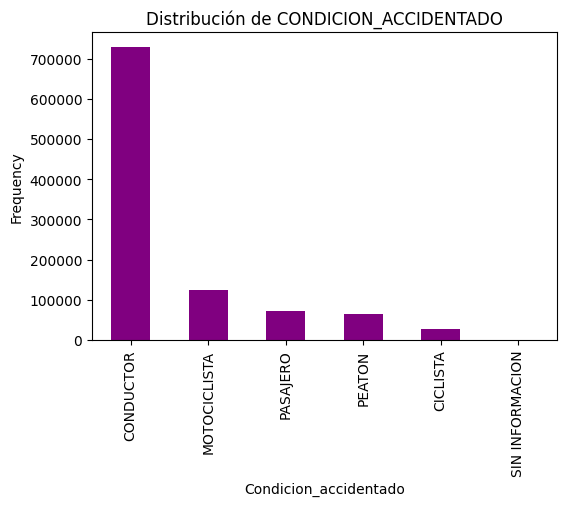

In [14]:
# Frecuencias: CONDICION_ACCIDENTADO
plot_frequency(view_di_copy, 'CONDICION_ACCIDENTADO', (6, 4), 'purple', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
KENNEDY              119048          11.72%
ENGATIVA             107573          10.59%
SUBA                 101347          9.97%
USAQUEN              98679           9.71%
FONTIBON             77809           7.66%
PUENTE ARANDA        73192           7.20%
CHAPINERO            67277           6.62%
TEUSAQUILLO          55893           5.50%
BARRIOS UNIDOS       53543           5.27%
BOSA                 42345           4.17%
CIUDAD BOLIVAR       37919           3.73%
LOS MARTIRES         34209           3.37%
SANTA FE             28763           2.83%
RAFAEL URIBE URIBE   27010           2.66%
SAN CRISTOBAL        25134           2.47%
TUNJUELITO           24866           2.45%
USME                 18242           1.80%
ANTONIO NARINO       18198           1.79%
CANDELARIA           5023            0.49%
SIN INFORMACION      108             0.01%
SUMAPAZ              15              0.00%


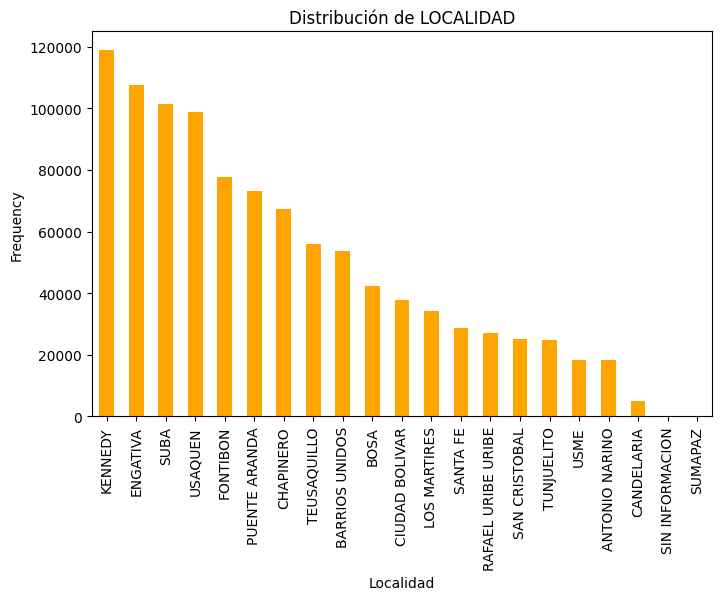

In [15]:
# Frecuencias: LOCALIDAD
plot_frequency(view_di_copy, 'LOCALIDAD', (8, 5), 'orange', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
CONDUCTOR            614152          60.44%
SIN INFORMACION      359757          35.40%
PEATON               40482           3.98%
PASAJERO             1802            0.18%


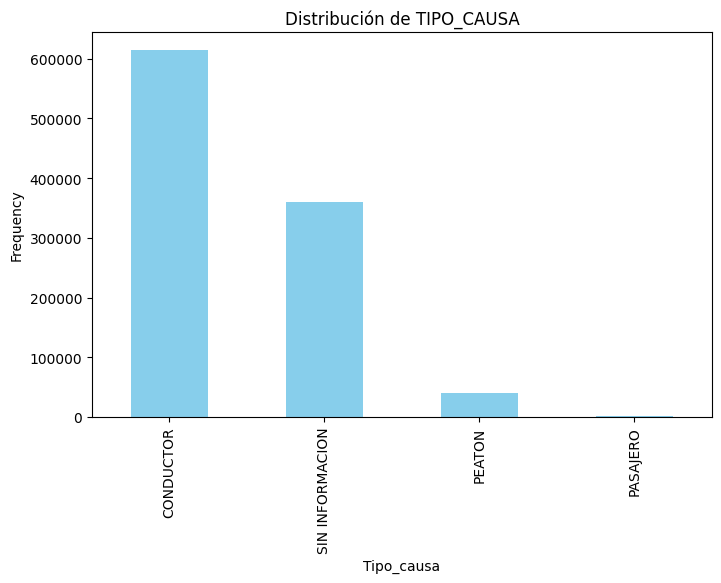

In [16]:
# Frecuencias: TIPO_CAUSA
plot_frequency(view_di_copy, 'TIPO_CAUSA', (8, 5), 'skyblue', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
SIN INFORMACION      691016          68.00%
PASAJEROS - INDIVIDUAL 70729           6.96%
CARGA - EXTRAPESADA  50365           4.96%
PASAJEROS - ESPECIAL ESCOLAR 41783           4.11%
PASAJEROS - MASIVO   40236           3.96%
MIXTO                39479           3.88%
CARGA-PESADA         37083           3.65%
PASAJEROS - COLECTIVO 28842           2.84%
CARGA - EXTRADIMENSIONADA 8675            0.85%
PASAJEROS - ESPECIAL TURISMO 4956            0.49%
PASAJEROS - ESPECIAL OCASIONAL 1633            0.16%
PASAJEROS - ESPECIAL ASALARIAD 1271            0.13%
CARGA - MERCANCIA PELIGROSA 125             0.01%


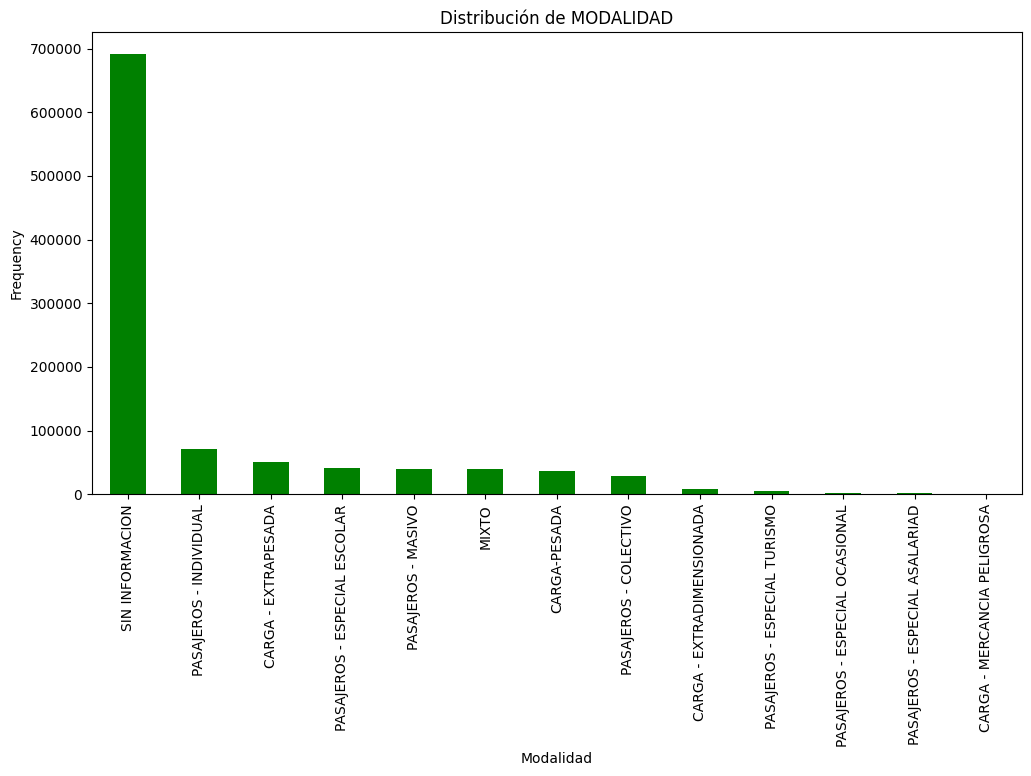

In [17]:
# Frecuencia Modalidad
plot_frequency(view_di_copy, 'MODALIDAD', (12, 6), 'green', 90)


Frecuencia formateada:
Categoría            Frecuencia      Participación
N                    850552          83.70%
SIN INFORMACION      155280          15.28%
S                    10361           1.02%


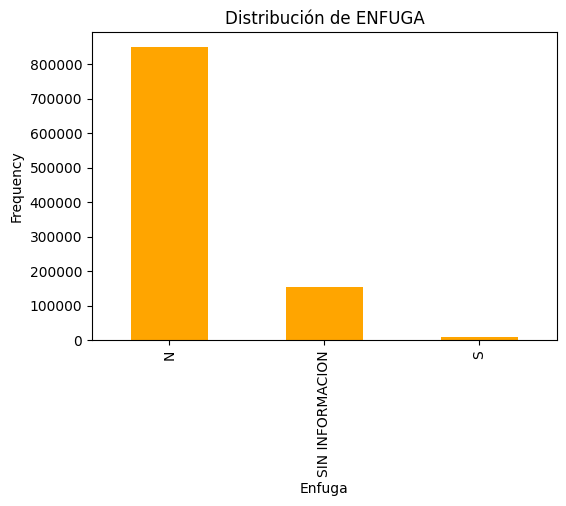

In [18]:
# Frecuencias: ENFUGA
plot_frequency(view_di_copy, 'ENFUGA', (6, 4), 'orange', 90)

In [19]:
# Histograma Edad
view_di_copy['EDAD'].describe().round(0)

count    1016193.0
mean          37.0
std           23.0
min        -7624.0
25%           26.0
50%           35.0
75%           46.0
max         2021.0
Name: EDAD, dtype: float64

In [8]:
# Quitar edades irregulares
view_di_copy = view_di_copy[(view_di_copy['EDAD'] > 0) & (view_di_copy['EDAD'] < 120)].reset_index(drop=True)

view_di_copy['EDAD'].describe().round(0)

count    994752.0
mean         37.0
std          14.0
min           1.0
25%          27.0
50%          35.0
75%          46.0
max         119.0
Name: EDAD, dtype: float64

In [21]:
# Nro Infracciones
view_di_copy['nroinfracciones'].describe().round(0)

count    997025.0
mean          0.0
std           1.0
min          -1.0
25%          -1.0
50%           1.0
75%           1.0
max           3.0
Name: nroinfracciones, dtype: float64


Frecuencia formateada:
Categoría            Frecuencia      Participación
VIERNES              160342          16.08%
SABADO               154821          15.53%
MARTES               152458          15.29%
MIERCOLES            148014          14.85%
JUEVES               145432          14.59%
LUNES                134471          13.49%
DOMINGO              101487          10.18%


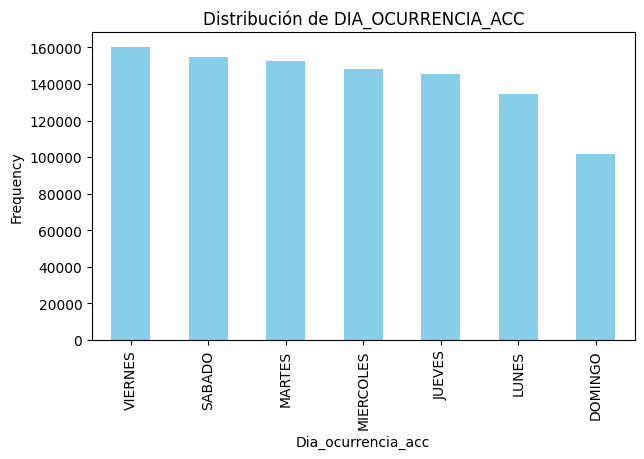

In [22]:
# Frecuencias: Dias Ocurrencia Accidente
plot_frequency(view_di_copy, 'DIA_OCURRENCIA_ACC', (7, 4), 'skyblue', 90)

In [30]:
# Frecuencias: Mes de Ocurrencia
view_di_copy['MES_OCURRENCIA_ACC'].unique()

array(['FEBRERO', 'MARZO', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO',
       'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'ENERO', 'DICIEMBRE',
       'ABRIL'], dtype=object)

**Variable Objetivo: ESTADO**


Frecuencia formateada:
Categoría            Frecuencia      Participación
ILESO                741176          74.34%
HERIDO               248193          24.89%
MUERTO               7656            0.77%


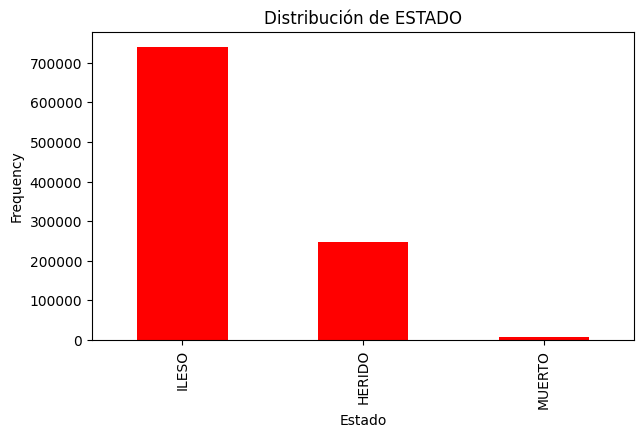

In [23]:
# Frecuencias: ESTADO
plot_frequency(view_di_copy, 'ESTADO', (7, 4), 'red', 90)

#### Modelado de Datos

In [9]:
view_di_model = view_di_copy.copy()

# Hora Format
view_di_model['HORA_OCURRENCIA_ACC'] = pd.to_datetime(view_di_model['HORA_OCURRENCIA_ACC'], format='%H:%M:%S').dt.time

**Excluir Localidades Sin Información**

In [10]:
# Excluir Localidades sin Información
view_di_model = view_di_model[(view_di_model['LOCALIDAD'] != 'SIN INFORMACION')].reset_index(drop=True)

**Imputar Tipo Causa**

In [11]:
# Tipo Causa
view_di_model.loc[view_di_model['TIPO_CAUSA'] == 'SIN INFORMACION', 'TIPO_CAUSA'] = 'VEHICULO-VIA'

# Nro Infracciones
view_di_model.loc[view_di_model['nroinfracciones'] == -1, 'nroinfracciones'] = 0

In [12]:
view_di_model['TIPO_CAUSA'].value_counts()

TIPO_CAUSA
CONDUCTOR       600686
VEHICULO-VIA    353049
PEATON           39247
PASAJERO          1770
Name: count, dtype: int64

**Excluir Variables**

In [13]:
# En fuga solo tiene un 1% de datos relevantes, y modalidad más del 70% de datos faltantes.
view_di_model.drop(columns=['ENFUGA', 'MODALIDAD', 'DIRECCION', 'FECHA_HORA_ACC'], inplace=True)

**Categorizar Parte del Día**

In [15]:
view_di_model

FECHA_OCURRENCIA_ACC HORA_OCURRENCIA_ACC  ANO_OCURRENCIA_ACC  \
0       2014-10-13 19:00:00            14:40:00                2014   
1       2014-11-27 19:00:00            15:20:00                2014   
2       2014-11-27 19:00:00            05:10:00                2014   
3       2007-05-14 19:00:00            15:10:00                2007   
4       2007-03-30 19:00:00            13:40:00                2007   
...                     ...                 ...                 ...   
994747  2010-08-01 19:00:00            07:49:00                2010   
994748  2023-07-18 19:00:00            06:40:00                2023   
994749  2015-10-11 19:00:00            11:20:00                2015   
994750  2007-07-24 19:00:00            17:30:00                2007   
994751  2013-05-27 19:00:00            11:00:00                2013   

       MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC     GRAVEDAD    TIPO_CAUSA  \
0                 OCTUBRE             MARTES   SOLO DANOS     CONDUCTOR   
1               NOVIEMBRE            VIERNES   SOLO DANOS     CONDUCTOR   
2               NOVIEMBRE            VIERNES   SOLO DANOS     CONDUCTOR   
3                    MAYO             MARTES   SOLO DANOS  VEHICULO-VIA   
4                   MARZO             SABADO   SOLO DANOS     CONDUCTOR   
...                   ...                ...          ...           ...   
994747             AGOSTO              LUNES  CON HERIDOS        PEATON   
994748              JULIO          MIERCOLES  CON HERIDOS  VEHICULO-VIA   
994749            OCTUBRE              LUNES  CON HERIDOS  VEHICULO-VIA   
994750              JULIO          MIERCOLES  CON HERIDOS        PEATON   
994751               MAYO             MARTES  CON HERIDOS        PEATON   

        nroinfracciones  CLASE_ACC       LOCALIDAD   LATITUD   LONGITUD  \
0                   1.0     CHOQUE        FONTIBON  4.681741 -74.154153   
1                   1.0     CHOQUE        FONTIBON  4.649132 -74.126261   
2                   1.0     CHOQUE  CIUDAD BOLIVAR  4.559191 -74.139285   
3                   0.0     CHOQUE        ENGATIVA  4.687683 -74.082183   
4                   1.0     CHOQUE        ENGATIVA  4.675536 -74.117085   
...                 ...        ...             ...       ...        ...   
994747              1.0  ATROPELLO  CIUDAD BOLIVAR  4.575000 -74.154300   
994748              0.0  ATROPELLO   PUENTE ARANDA  4.602866 -74.131531   
994749              0.0  ATROPELLO      TUNJUELITO  4.571912 -74.128454   
994750              1.0  ATROPELLO      TUNJUELITO  4.560246 -74.125617   
994751              1.0  ATROPELLO  CIUDAD BOLIVAR  4.548656 -74.140680   

       CONDICION_ACCIDENTADO  ESTADO     FECHA_NACIMIENTO  EDAD     GENERO  \
0                  CONDUCTOR   ILESO  1989-05-09 19:00:00  25.0  MASCULINO   
1                  CONDUCTOR   ILESO  1966-06-01 19:00:00  48.0  MASCULINO   
2                  CONDUCTOR   ILESO  1979-02-04 19:00:00  35.0  MASCULINO   
3                  CONDUCTOR   ILESO  1938-03-08 19:00:00  69.0  MASCULINO   
4                  CONDUCTOR   ILESO  1968-02-09 19:00:00  39.0  MASCULINO   
...                      ...     ...                  ...   ...        ...   
994747                PEATON  HERIDO  2000-05-27 19:00:00  10.0  MASCULINO   
994748                PEATON  HERIDO  2014-04-09 19:00:00   9.0   FEMENINO   
994749                PEATON  HERIDO  1989-01-29 19:00:00  26.0  MASCULINO   
994750                PEATON  HERIDO  2001-05-30 19:00:00   6.0   FEMENINO   
994751                PEATON  HERIDO  1946-05-16 19:00:00  67.0   FEMENINO   

       CLASE_DE_VEHICULO TIPO_DE_SERVICIO  
0         CAMION, FURGON          PUBLICO  
1           TRACTOCAMION          PUBLICO  
2               VOLQUETA       PARTICULAR  
3              AUTOMOVIL       PARTICULAR  
4              AUTOMOVIL  SIN INFORMACION  
...                  ...              ...  
994747   NO IDENTIFICADO  SIN INFORMACION  
994748   NO IDENTIFICADO  SIN INFORMACION  
994749   NO IDENTIF

In [213]:
# Agregar Partes del día
def categorizar_parte_del_dia(data: pd.DataFrame):
    """
    """
    import numpy as np

    # Condiciones
    condiciones = [
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('06:00:00').time()),
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('12:00:00').time()),
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('18:00:00').time()),
    ]

    # Etiquetas para cada condición
    labels = ['MADRUGADA', 'MANANA', 'TARDE']

    # Aplicar la categorización
    array_labels = np.select(condiciones, labels, default='NOCHE')

    return array_labels


# Agregar Parte
view_di_model['PARTE_DEL_DIA'] = categorizar_parte_del_dia(view_di_model)

# Drop Hora Ocurrencia
view_di_model.drop(columns=['HORA_OCURRENCIA_ACC'], inplace=True)

**Mapeo de Vehiculos**

In [214]:
mapeo_vehiculos = {
    'AUTOMOVIL': 'VEHICULOS PERSONALES',
    'MOTOCICLETA': 'VEHICULOS PERSONALES',
    'CAMPERO': 'VEHICULOS PERSONALES',
    'BICICLETA': 'VEHICULOS PERSONALES',
    'CUATRIMOTO': 'VEHICULOS PERSONALES',
    'CAMIONETA': 'VEHICULOS COMERCIALES',
    'CAMION, FURGON': 'VEHICULOS COMERCIALES',
    'TRACTOCAMION': 'VEHICULOS COMERCIALES',
    'VOLQUETA': 'VEHICULOS COMERCIALES',
    'MOTOCARRO': 'VEHICULOS COMERCIALES',
    'M. INDUSTRIAL': 'VEHICULOS COMERCIALES',
    'M. AGRICOLA': 'VEHICULOS COMERCIALES',
    'REMOLQUE': 'VEHICULOS COMERCIALES',
    'BUS': 'TRANSPORTE PUBLICO',
    'MICROBUS': 'TRANSPORTE PUBLICO',
    'BUSETA': 'TRANSPORTE PUBLICO',
    'BUS ARTICULADO': 'TRANSPORTE PUBLICO',
    'BUS ALIMENTADOR': 'TRANSPORTE PUBLICO',
    'METRO': 'TRANSPORTE PUBLICO',
    'TREN': 'TRANSPORTE PUBLICO',
    'NO IDENTIFICADO': 'OTROS',
    'OTRO': 'OTROS',
    'TRACCION ANIMAL': 'OTROS',
    'BICITAXI': 'OTROS',
    'AMBULANCIA': 'OTROS'
}

# Aplicar el mapeo al DataFrame
view_di_model['CLASE_DE_VEHICULO'] = view_di_model['CLASE_DE_VEHICULO'].map(mapeo_vehiculos)

**Mapeo Tipo Servicio**

In [215]:
mapeo_categorias = {
    'PARTICULAR': 'PARTICULAR',
    'PUBLICO': 'PUBLICO',
    'SIN INFORMACION': 'OTRO',
    'OFICIAL': 'OTRO',
    'DIPLOMATICO': 'OTRO'
}

# Aplicar el mapeo al DataFrame
view_di_model['TIPO_DE_SERVICIO'] = view_di_model['TIPO_DE_SERVICIO'].map(mapeo_categorias)

**Excluir Últimas Fechas**

In [216]:
view_di_model.drop(columns=['FECHA_OCURRENCIA_ACC', 'FECHA_NACIMIENTO'], inplace=True)

In [217]:
print(f'Dimensiones Dataset Model: {view_di_model.shape=}')
view_di_model.head(3)

Dimensiones Dataset Model: view_di_model.shape=(997922, 17)


ANO_OCURRENCIA_ACC MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC     GRAVEDAD  \
0                2011            FEBRERO            DOMINGO   SOLO DANOS   
1                2011            FEBRERO              LUNES   SOLO DANOS   
2                2011              MARZO             MARTES  CON HERIDOS   

  TIPO_CAUSA  nroinfracciones  CLASE_ACC  LOCALIDAD   LATITUD   LONGITUD  \
0  CONDUCTOR              1.0     CHOQUE    KENNEDY  4.640961 -74.156199   
1  CONDUCTOR              1.0     CHOQUE  CHAPINERO  4.659842 -74.054429   
2  CONDUCTOR              1.0  ATROPELLO    USAQUEN  4.693240 -74.034876   

  CONDICION_ACCIDENTADO ESTADO  EDAD     GENERO      CLASE_DE_VEHICULO  \
0             CONDUCTOR  ILESO  62.0  MASCULINO   VEHICULOS PERSONALES   
1             CONDUCTOR  ILESO  49.0  MASCULINO     TRANSPORTE PUBLICO   
2             CONDUCTOR  ILESO  37.0  MASCULINO  VEHICULOS COMERCIALES   

  TIPO_DE_SERVICIO PARTE_DEL_DIA  
0       PARTICULAR         NOCHE  
1          PUBLICO        MANANA  
2       PARTICULAR         TARDE

**Entrenar Modelo**

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [219]:
# Codificar la variable objetivo con Label Encoding
label_encoder = LabelEncoder()
view_di_model['ESTADO'] = label_encoder.fit_transform(view_di_model['ESTADO'])

# Setear Genero
view_di_model['GENERO'] = view_di_model['GENERO'].map({'MASCULINO': 1, 'FEMENINO': 0})

# Transformador de columna para aplicar transformaciones específicas a cada tipo de características
categorical_features = view_di_model.select_dtypes(include=['object', 'category']).columns
numerical_features = ['LATITUD', 'LONGITUD', 'EDAD', 'nroinfracciones']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Preprocesar las características
X = preprocessor.fit_transform(view_di_model.drop('ESTADO', axis=1))
y = view_di_model['ESTADO']


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [223]:
# Entrenar el modelo XGBoost
model = xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     37400
           1       0.96      0.98      0.97    111116
           2       0.84      0.91      0.87      1173

    accuracy                           0.96    149689
   macro avg       0.91      0.92      0.92    149689
weighted avg       0.96      0.96      0.96    149689



In [228]:
# Evaluar el modelo
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))

              precision    recall  f1-score   support

      HERIDO       0.94      0.88      0.91     37400
       ILESO       0.96      0.98      0.97    111116
      MUERTO       0.84      0.91      0.87      1173

    accuracy                           0.96    149689
   macro avg       0.91      0.92      0.92    149689
weighted avg       0.96      0.96      0.96    149689



#### Pipeline de Datos

In [16]:
# Variables Drop Inicial
COD_VARIABLES = ['FORMULARIO', 'CODIGO_ACCIDENTE', 'CODIGO_ACCIDENTADO', 'CODIGO_VEHICULO', 
                'MUERTE_POSTERIOR', 'FECHA_POSTERIOR_MUERTE', 'MUNICIPIO']

# Diccionario de Vehiculos
MAPEO_VEHICULOS = {
    'AUTOMOVIL': 'VEHICULOS PERSONALES',
    'MOTOCICLETA': 'VEHICULOS PERSONALES',
    'CAMPERO': 'VEHICULOS PERSONALES',
    'BICICLETA': 'VEHICULOS PERSONALES',
    'CUATRIMOTO': 'VEHICULOS PERSONALES',
    'CAMIONETA': 'VEHICULOS COMERCIALES',
    'CAMION, FURGON': 'VEHICULOS COMERCIALES',
    'TRACTOCAMION': 'VEHICULOS COMERCIALES',
    'VOLQUETA': 'VEHICULOS COMERCIALES',
    'MOTOCARRO': 'VEHICULOS COMERCIALES',
    'M. INDUSTRIAL': 'VEHICULOS COMERCIALES',
    'M. AGRICOLA': 'VEHICULOS COMERCIALES',
    'REMOLQUE': 'VEHICULOS COMERCIALES',
    'BUS': 'TRANSPORTE PUBLICO',
    'MICROBUS': 'TRANSPORTE PUBLICO',
    'BUSETA': 'TRANSPORTE PUBLICO',
    'BUS ARTICULADO': 'TRANSPORTE PUBLICO',
    'BUS ALIMENTADOR': 'TRANSPORTE PUBLICO',
    'METRO': 'TRANSPORTE PUBLICO',
    'TREN': 'TRANSPORTE PUBLICO',
    'NO IDENTIFICADO': 'OTROS',
    'OTRO': 'OTROS',
    'TRACCION ANIMAL': 'OTROS',
    'BICITAXI': 'OTROS',
    'AMBULANCIA': 'OTROS'
}

# DICCIONARIO DE CATEGORIAS
MAPEO_CATEGORIAS = {
    'PARTICULAR': 'PARTICULAR',
    'PUBLICO': 'PUBLICO',
    'SIN INFORMACION': 'OTRO',
    'OFICIAL': 'OTRO',
    'DIPLOMATICO': 'OTRO'
}

In [17]:
# Preparar Dataset
def fill_nulls(dataset: pd.DataFrame):
    """
    """
    # Make Copy
    view_di_copy = dataset.copy()

    # Llenar Nulos
    for column in view_di_copy.columns:
        if view_di_copy[column].dtype == 'object':  # Identifica columnas categóricas
            view_di_copy[column] = view_di_copy[column].fillna('SIN INFORMACION')
        else:  # Para columnas numéricas
            view_di_copy[column] = view_di_copy[column].fillna(-1)

    return view_di_copy


def cleaning_dataset(dataset: pd.DataFrame):
    """
    """
    # Make Copy
    view_di_copy = dataset.copy()

    # Drop Variables
    view_di_copy.drop(columns=COD_VARIABLES, inplace=True)

    # Corregir Espacios en Blanco Tipo-Servicio
    view_di_copy['TIPO_DE_SERVICIO'] = view_di_copy['TIPO_DE_SERVICIO'].str.strip()
            
    # Corregir NO IDENTIFICADO
    view_di_copy.loc[view_di_copy['CLASE_DE_VEHICULO'] == 'SIN INFORMACION', 'CLASE_DE_VEHICULO'] = 'NO IDENTIFICADO'

    # Excluir Localidades sin información (Menos del 1%)
    view_di_copy = view_di_copy[view_di_copy['LOCALIDAD'] != 'SIN INFORMACION']

    # Excluir registros sin información del GENERO (Menos del 2%)
    view_di_copy = view_di_copy[view_di_copy['GENERO'] != 'SIN INFORMACION']

    # Excluir registros sin información de la GRAVEDAD del accidente (Menos del 0.01%)
    view_di_copy = view_di_copy[view_di_copy['GRAVEDAD'] != 'SIN INFORMACION'].reset_index(drop=True)

    # Excluir registros sin información de la CONDICION_ACCIDENTADO (Menos del 0.01%)
    view_di_copy = view_di_copy[view_di_copy['CONDICION_ACCIDENTADO'] != 'SIN INFORMACION'].reset_index(drop=True)

    # Excluir Edades Irregularidades
    view_di_copy = view_di_copy[(view_di_copy['EDAD'] > 0) & (view_di_copy['EDAD'] < 120)].reset_index(drop=True)

    return view_di_copy


def cleaning_dataset_part_2(dataset: pd.DataFrame):
    """
    """
    # Make Copy
    view_di_model = dataset.copy()

    # Excluir Localidades sin Información
    view_di_model = view_di_model[(view_di_model['LOCALIDAD'] != 'SIN INFORMACION')].reset_index(drop=True)

    # Tipo Causa
    view_di_model.loc[view_di_model['TIPO_CAUSA'] == 'SIN INFORMACION', 'TIPO_CAUSA'] = 'VEHICULO-VIA'

    # Nro Infracciones
    view_di_model.loc[view_di_model['nroinfracciones'] == -1, 'nroinfracciones'] = 0

    # En fuga solo tiene un 1% de datos relevantes, y modalidad más del 70% de datos faltantes.
    view_di_model.drop(columns=['ENFUGA', 'MODALIDAD', 'DIRECCION', 'FECHA_HORA_ACC'], inplace=True)

    return view_di_model


# Agregar Partes del día
def categorizar_parte_del_dia(data: pd.DataFrame):
    """
    """
    import numpy as np

    # Condiciones
    condiciones = [
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('06:00:00').time()),
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('12:00:00').time()),
        (data['HORA_OCURRENCIA_ACC'] < pd.Timestamp('18:00:00').time()),
    ]

    # Etiquetas para cada condición
    labels = ['MADRUGADA', 'MANANA', 'TARDE']

    # Aplicar la categorización
    array_labels = np.select(condiciones, labels, default='NOCHE')

    return array_labels


def add_transformations(dataset: pd.DataFrame):
    """
    """
    # Make Copy
    view_di_model = dataset.copy()

    # Agregar Parte del día
    view_di_model['HORA_OCURRENCIA_ACC'] = pd.to_datetime(view_di_model['HORA_OCURRENCIA_ACC'], format='%H:%M:%S').dt.time
    view_di_model['PARTE_DEL_DIA'] = categorizar_parte_del_dia(view_di_model)

    # Drop Hora Ocurrencia
    view_di_model.drop(columns=['HORA_OCURRENCIA_ACC'], inplace=True)

    # Aplicar el mapeo a la clase de Vehiculo
    view_di_model['CLASE_DE_VEHICULO'] = view_di_model['CLASE_DE_VEHICULO'].map(MAPEO_VEHICULOS)

    # Aplicar el mapeo al Tipo de Servicio
    view_di_model['TIPO_DE_SERVICIO'] = view_di_model['TIPO_DE_SERVICIO'].map(MAPEO_CATEGORIAS)

    # Excluir Fechas de Ocurrencia y de Nacimiento (Se usan en otras variables creadas)
    view_di_model.drop(columns=['FECHA_OCURRENCIA_ACC', 'FECHA_NACIMIENTO'], inplace=True)

    return view_di_model


# Prepare dataset
def prepare_dataset(dataset: pd.DataFrame):
    """
    """
    # Make Copy
    df_aux = dataset.copy()

    # Fill valores faltantes
    df_aux = fill_nulls(df_aux)

    # Cleaning Dataset
    df_aux = cleaning_dataset_part_2(
                    cleaning_dataset(df_aux)
            )
    
    # Add Transformaciones o nuevas variables
    df_aux = add_transformations(df_aux)

    return df_aux

##### Preparar Datos

In [19]:
view_di_copy = view_di.copy()

dataset_prepared = prepare_dataset(view_di_copy)

In [30]:
dataset_prepared.head(3)

ANO_OCURRENCIA_ACC MES_OCURRENCIA_ACC DIA_OCURRENCIA_ACC    GRAVEDAD  \
0                2014            OCTUBRE             MARTES  SOLO DANOS   
1                2014          NOVIEMBRE            VIERNES  SOLO DANOS   
2                2014          NOVIEMBRE            VIERNES  SOLO DANOS   

  TIPO_CAUSA  nroinfracciones CLASE_ACC       LOCALIDAD   LATITUD   LONGITUD  \
0  CONDUCTOR              1.0    CHOQUE        FONTIBON  4.681741 -74.154153   
1  CONDUCTOR              1.0    CHOQUE        FONTIBON  4.649132 -74.126261   
2  CONDUCTOR              1.0    CHOQUE  CIUDAD BOLIVAR  4.559191 -74.139285   

  CONDICION_ACCIDENTADO ESTADO  EDAD     GENERO      CLASE_DE_VEHICULO  \
0             CONDUCTOR  ILESO  25.0  MASCULINO  VEHICULOS COMERCIALES   
1             CONDUCTOR  ILESO  48.0  MASCULINO  VEHICULOS COMERCIALES   
2             CONDUCTOR  ILESO  35.0  MASCULINO  VEHICULOS COMERCIALES   

  TIPO_DE_SERVICIO PARTE_DEL_DIA  
0          PUBLICO         TARDE  
1          PUBLICO         TARDE  
2       PARTICULAR     MADRUGADA

In [21]:
dataset_prepared.shape

(994752, 17)

In [38]:
DATA_DIR = f'{os.path.dirname(os.getcwd())}/src/data'
dataset_prepared.to_csv(f'{DATA_DIR}/data_prepared.csv')

In [44]:
dataset_prepared['TIPO_DE_SERVICIO'].unique()

array(['PUBLICO', 'PARTICULAR', 'OTRO'], dtype=object)

In [34]:
from datetime import datetime
datetime.now().minute

38

##### Pipeline

In [22]:
dataset_model = dataset_prepared.copy()

In [28]:
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

class ModelTuner:
    def __init__(self, model, param_grid, dataset):
        self.model = model
        self.param_grid = param_grid
        self.dataset = dataset
        self.label_encoder = LabelEncoder()
        
        # Pre-procesamiento inicial
        self.dataset['ESTADO'] = self.label_encoder.fit_transform(self.dataset['ESTADO'])

    def encode_gender(self, X):
        X = X.copy()
        X['GENERO'] = X['GENERO'].map({'MASCULINO': 1, 'FEMENINO': 0})
        return X
    
    def create_column_transformer(self):
        categorical_features = self.dataset.select_dtypes(include=['object', 'category']).columns
        numerical_features = ['LATITUD', 'LONGITUD', 'EDAD', 'nroinfracciones']
        return ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(), categorical_features)
            ]
        )
    
    def tune_model(self):
        initial_transformer = FunctionTransformer(self.encode_gender)
        pipeline = Pipeline([
            ('initial_preprocessing', initial_transformer),
            ('preprocessor', self.create_column_transformer()),
            ('classifier', self.model)
        ])
        
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=self.param_grid,
            n_iter=4, # Definir 10 iteraciones
            cv=2,
            verbose=2,
            random_state=42,
            n_jobs=-1
        )
        
        X_train, X_test, y_train, y_test = train_test_split(self.dataset.drop('ESTADO', axis=1), self.dataset['ESTADO'], test_size=0.15, stratify=self.dataset['ESTADO'], random_state=42)
        random_search.fit(X_train, y_train)
        y_pred = random_search.predict(X_test)
        
        print(classification_report(self.label_encoder.inverse_transform(y_test), self.label_encoder.inverse_transform(y_pred)))
        print("Mejores parámetros:", random_search.best_params_)
        
        # Serializar y guardar el modelo en un archivo .pkl
        with open(f'{os.path.dirname(os.getcwd())}/src/model/best_model.pkl', 'wb') as file:
            pickle.dump(random_search.best_estimator_, file)
        print("Modelo guardado como best_model.pkl")


##### **Fit Xgboost**

In [20]:
from xgboost import XGBClassifier

# Parámetros para XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.5, 0.75, 1.0],
    'classifier__colsample_bytree': [0.5, 0.75, 1.0],
    'classifier__min_child_weight': [1, 5, 10]
}

# Tuneo de hiper-parámetros usando la clase definida
tuner_xgb = ModelTuner(XGBClassifier(objective='multi:softprob', 
                                    use_label_encoder=False, 
                                    eval_metric='mlogloss'), param_grid_xgb, dataset_model)
tuner_xgb.tune_model()

Fitting 2 folds for each of 2 candidates, totalling 4 fits
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     37145
           1       0.96      0.98      0.97    110924
           2       0.83      0.91      0.87      1144

    accuracy                           0.96    149213
   macro avg       0.91      0.92      0.92    149213
weighted avg       0.96      0.96      0.96    149213

Mejores parámetros: {'classifier__subsample': 0.5, 'classifier__n_estimators': 300, 'classifier__min_child_weight': 10, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.5}


##### **Fit LightGBM**

In [29]:
# Uso de la clase con LightGBM
from lightgbm import LGBMClassifier

# Parámetros para LightGBM
param_grid_lgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__num_leaves': [31, 50, 70]
}

# Tuneo de hiper-parámetros usando la clase definida
tuner = ModelTuner(LGBMClassifier(objective='multiclass',
                                num_class=3,
                                metric='multi_logloss'), param_grid_lgbm, dataset_model)
tuner.tune_model()

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 845539, number of used features: 76
[LightGBM] [Info] Start training from score -1.390536
[LightGBM] [Info] Start training from score -0.296533
[LightGBM] [Info] Start training from score -4.870791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [47]:
import pickle

with open(f'{os.path.dirname(os.getcwd())}/src/model/best_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [48]:
model

Pipeline(steps=[('initial_preprocessing',
                 FunctionTransformer(func=<bound method ModelTuner.encode_gender of <__main__.ModelTuner object at 0x000002B330971B40>>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['LATITUD', 'LONGITUD',
                                                   'EDAD', 'nroinfracciones']),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['MES_OCURRENCIA_ACC', 'DIA_OCURRENCIA_ACC', 'GRAVEDAD', 'TIPO_CAUSA',
       'CLASE_ACC', 'LOCALIDAD', 'CONDICION_ACCIDENTADO', 'GENERO',
       'CLASE_DE_VEHICULO', 'TIPO_DE_SERVICIO', 'PARTE_DEL_DIA'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.05, max_depth=5,
                                metric='multi_logloss', n_estimators=300,
                                num_class=3, num_leaves=70,
                                objective='multiclass', subsample=0.8))])